<a href="https://colab.research.google.com/github/jeffreygalle/MAT422/blob/main/hw2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Likelihood Estimation (MLE)

Goal of MLE: find the most probable parameter values given the data.

MLE estimates the parameters of a probability distribution. MLE works by maximizing the likelihood function. The likelihood function represents the probability of observing the given data, given a set of parameters.

The parameters that maximize the likelihood function are called the maximum likelihood estimates (MLEs).


Likelihood function:
The likelihood function is a joint probability mass function (pmf) or probability density function (pdf) of the form f(x1, x2, ..., xn; θ1, ..., θm), where θ1, ..., θm are unknown values.

After the sample data x1, x2, ..., xn have been observed, the likelihood function is considered as a function of the unknown parameteres θ1, θ2, ..., θm.


The MLEs are the parameter values ^θ1, ^θ2, ..., ^θm that maximize the likelihood function.

f(x1, ..., xn; ^θ1, ..., ^θm) ≥ f(x1, ..., xn; θ1, ..., θm) for all values θ1, θ2, ..., θm.


When the observed data Xi's are substituted for xi's in the likelihood function, the resutling values of the parameters that maximize this function are the maximum likelihood estimators



In [2]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm

"""
This code uses an optimization routine (scipy.optimize.minimize) to find the
parameters (mean, standard deviation) that maximize the likelihood that the
observed data was generated by the distribution.
"""

# simulating a dataset from normal distribution
np.random.seed(0)
data = np.random.normal(loc=5, scale=2, size=1000)


'''
This implementation of the negative_log_likelihood function was
inspired by assistance from OpenAI's ChatGPT
'''

def negative_log_likelihood(params, data):
    mu, sigma = params[0], params[1]
    # Calculate the negative log-likelihood
    nll = -np.sum(norm.logpdf(data, loc=mu, scale=sigma))
    return nll

# perform initial guess for the parameters
initial_params = [0, 1]

# minimize the negative log-likelihood
resultant = minimize(negative_log_likelihood, initial_params, args=(data,), bounds=[(None, None), (1e-5, None)])

# MLE for mu and sigma
mle_mu, mle_sigma = resultant.x

print(f"MLE for mean (mu): {mle_mu}")
print(f"MLE for standard deviation (sigma): {mle_sigma}")


MLE for mean (mu): 4.909487268921732
MLE for standard deviation (sigma): 1.974066909853228


# 2.4.2 Linear Regression

Goal:  linear regression and how it can be interpreted from a maximum likelihood estimation (MLE).

Goal (ii): Instead of using ordinary least squares, we derive the parameters using a probabilistic approach.

We are given input data points (xi, yi) where xi = (xi1, ..., xip) represents the features of the ith data point

The goal is to find the coefficients β0, β1, ..., βp, that best fit an affine function:

^yi = β0 + β1 + ... + βpxip


The coefficients βj are found  minimizing the sum of squared residuals (differences between observed and prediucted yi and ^yi values, respectively)


Linear regression can be understood by assuming that the output yi's are drawn from a normal distribution.

The assumption is that for each data point, yi is an independent and identically distributed (i.i.d.) sample from a normal distribution with mean ^yi (the predicted value) and variances σ^2.


The likelihood function is constructed by multiplying the normal probability density functions (pdfs) of the n data points (becxause they are i.i.d.).

Goal: maximize the likelihood to estimate the best fit coefficients βj.


MLE estimate for beta_0 (intercept): 2.2150958357453696
MLE estimate for beta_1 (slope): 1.4540226654906323
MLE estimate for sigma (error standard deviation): 0.8981006857682023


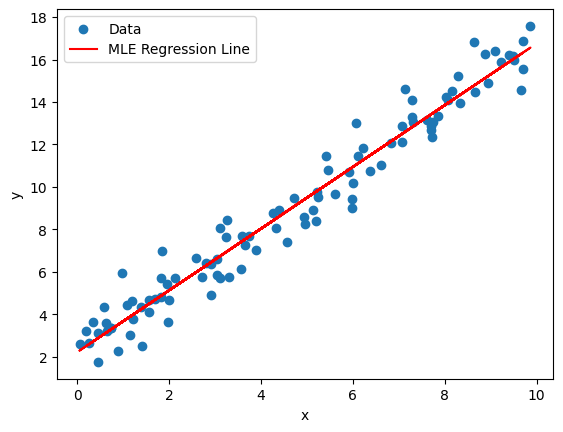

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# simulate data set for linear regression
np.random.seed(42)
n = 100
x = np.random.uniform(0, 10, n)
# the true parameters for the underlying data
beta_0_true = 2.0
beta_1_true = 1.5
sigma_true = 1.0


# y with added noise to it
y = beta_0_true + beta_1_true * x + np.random.normal(0, sigma_true, n)

# define the negative log-likelihood function similar to previous code example
def negative_log_likelihood(params, x, y):
    beta_0, beta_1, sigma = params[0], params[1], params[2]
    # Predicted values
    y_pred = beta_0 + beta_1 * x
    #  normal distribution
    nll = -np.sum(norm.logpdf(y, loc=y_pred, scale=sigma))
    return nll

# initial guesses for intercept, slope, and sigma: beta_0, beta_1, and sigma
initial_params = [0, 0, 1]
result = minimize(negative_log_likelihood, initial_params, args=(x, y), bounds=[(None, None), (None, None), (1e-5, None)])

# MLE estimates for beta_0, beta_1, and sigma
mle_beta_0, mle_beta_1, mle_sigma = result.x

print(f"MLE estimate for beta_0 (intercept): {mle_beta_0}")
print(f"MLE estimate for beta_1 (slope): {mle_beta_1}")
print(f"MLE estimate for sigma (error standard deviation): {mle_sigma}")

# Plot the data and the regression line
plt.scatter(x, y, label="Data")
plt.plot(x, mle_beta_0 + mle_beta_1 * x, color="red", label="MLE Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
